# **Heart disease prediction**

## Introduction

Heart disease remains one of the leading causes of mortality worldwide. Early prediction and diagnosis can play a pivotal role in managing and potentially preventing the progression of this disease. With the advent of data science and machine learning, there is an increasing interest in developing predictive models that utilize patient data to forecast the likelihood of heart disease. This project aims to harness the power of such data-driven techniques to predict the presence of heart disease.

## Dataset Overview

The dataset used in this project comprises various medical and physiological attributes of individuals:

- **Age**: The age of the individual.
- **Sex**: Gender of the individual.
- **Chest Pain Type**: Categorized type of chest pain experienced.
- **BP**: Blood pressure measurement.
- **Cholesterol**: Serum cholesterol level.
- **FBS over 120**: Indicator for fasting blood sugar > 120 mg/dl.
- **EKG Results**: Results from an electrocardiogram test.
- **Max HR**: Maximum heart rate achieved during a stress test.
- **Exercise Angina**: Angina induced by exercise.
- **ST Depression**: Depression of the ST segment during exercise.
- **Slope of ST**: Slope of the peak exercise ST segment.
- **Number of Vessels Fluro**: Number of major vessels colored by fluoroscopy.
- **Thallium**: A type of nuclear stress test to visualize blood flow patterns into the heart.
- **Heart Disease**: Target variable indicating the presence or absence of heart disease.

## Project Workflow

1. **Data Cleaning and Descriptive Statistics**: The first step involves a thorough cleaning of the dataset. This includes handling missing values, removing outliers, and conducting descriptive statistics to understand the basic characteristics of the data.

2. **Data Distribution Analysis**: Before applying any predictive models, it's crucial to understand the distribution of the data. This step will involve visualizing the distribution of each variable and checking for normality.

3. **Parametric Tests**: Based on the distribution of the data, appropriate parametric tests will be conducted to understand the relationships between variables and their significance.

4. **Non-Parametric Tests**: For data that doesn't follow a normal distribution, non-parametric tests will be applied to decipher the relationships between variables.

5. **Regression Analysis**: Finally, regression techniques will be employed to develop a predictive model for heart disease based on the given attributes.

By following this structured approach, this project aims to provide a comprehensive analysis of the factors influencing heart disease and develop a reliable predictive model for the same.



The first step is to import all the libraries we nees for our project.

In [1]:
import pandas as pd
import numpy as np 
from scipy import stats
from scipy.stats import skew, shapiro, kstest, anderson, probplot, ttest_1samp, ttest_ind, friedmanchisquare
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.power import TTestIndPower
import statsmodels.api as sm
from statsmodels.formula.api import ols

We will continue by importing our dataset and assigning it to a Pandas dataframe, later we will display the first 5 rows of this dataframe to get a little insight into the contents of the dataset.

In [2]:
df=pd.read_excel("Group A. Heart_Disease_Prediction.xlsx")
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130.0,322.0,0,2,109.0,0,2.4,2,3,3,Presence
1,67,0,3,115.0,564.0,0,2,160.0,0,1.6,2,0,7,Absence
2,57,1,2,124.0,261.0,0,0,141.0,0,0.3,1,0,7,Presence
3,64,1,4,128.0,263.0,0,0,105.0,1,0.2,2,1,7,Absence
4,74,0,2,120.0,269.0,0,2,121.0,1,0.2,1,1,3,Absence


We change the names of the columns to avoid any space on them, to make it easier to work with them.

In [3]:
df.rename(columns = {'Chest pain type':'Chest_pain_type','FBS over 120':'FBS_over_120','EKG results':'EKG_results',\
                     'Max HR':'Max_HR','Exercise angina':'Exercise_angina','ST depression':'ST_depression',\
                     'Slope of ST':'Slope_of_ST','Number of vessels fluro':'Number_vessels_fluro',\
                     'Heart Disease':'Heart_Disease'}, inplace = True)

Now we check the number of rows and columns of the dataset with the .shape attribute, and later we check the data types of the dataset columns with the Pandas dtypes attribute.

In [4]:
df.shape

(270, 14)

In [5]:
df.dtypes

Age                       int64
Sex                       int64
Chest_pain_type           int64
BP                      float64
Cholesterol             float64
FBS_over_120              int64
EKG_results               int64
Max_HR                  float64
Exercise_angina           int64
ST_depression           float64
Slope_of_ST               int64
Number_vessels_fluro      int64
Thallium                  int64
Heart_Disease            object
dtype: object

## 1. Data Cleaning and Descriptive Statistics
The first step in cleaning the data is to determine how many duplicate rows exist in the dataframe.

In [6]:
df.duplicated().sum()

0

No duplicate rows. If we need to deal with duplicate rows, we would do so as follows:

 - df = df.drop_duplicates()
 
Later we should confirm that the duplicates have been removed:

 - df.duplicated().sum()
 
Checking the missing values is the next step.

In [7]:
df.isnull().sum()

Age                      0
Sex                      0
Chest_pain_type          0
BP                      15
Cholesterol             17
FBS_over_120             0
EKG_results              0
Max_HR                   9
Exercise_angina          0
ST_depression            4
Slope_of_ST              0
Number_vessels_fluro     0
Thallium                 0
Heart_Disease            0
dtype: int64

We calculate the mean of the variables where there are missing values in order to substitute them.

In [8]:
BPmean=df['BP'].mean()
Cholmean=df['Cholesterol'].mean()
Max_HRmean=df['Max_HR'].mean()
STmean=df['ST_depression'].mean()

We subtitute the missing values for the means.

In [9]:
df['BP'].fillna(value=BPmean, inplace=True)

df['Cholesterol'].fillna(value=Cholmean, inplace=True)

df['Max_HR'].fillna(value=Max_HRmean, inplace=True)

df['ST_depression'].fillna(value=STmean, inplace=True)

Check that the missing values have been replaced.

In [10]:
df.isnull().sum()

Age                     0
Sex                     0
Chest_pain_type         0
BP                      0
Cholesterol             0
FBS_over_120            0
EKG_results             0
Max_HR                  0
Exercise_angina         0
ST_depression           0
Slope_of_ST             0
Number_vessels_fluro    0
Thallium                0
Heart_Disease           0
dtype: int64

We make a boxplot for each variable to visualize outliers in the dataset

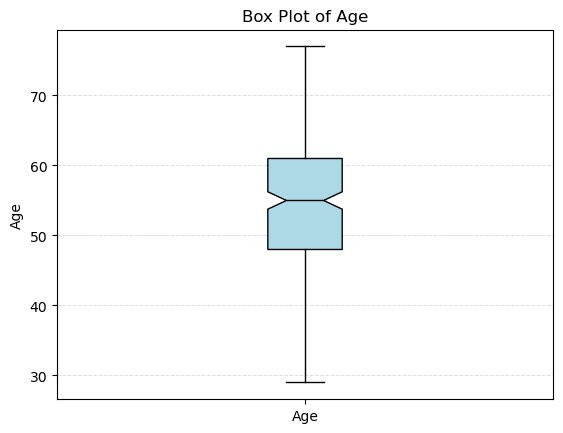

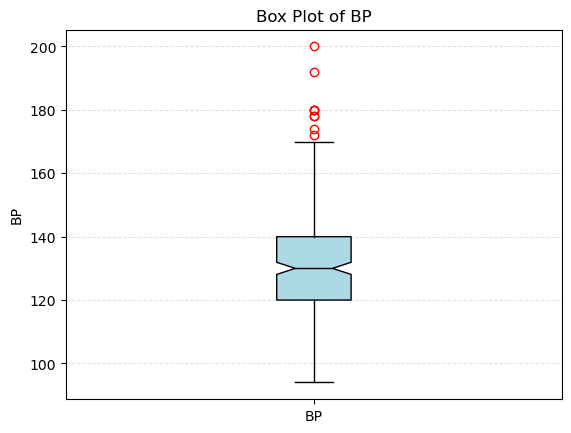

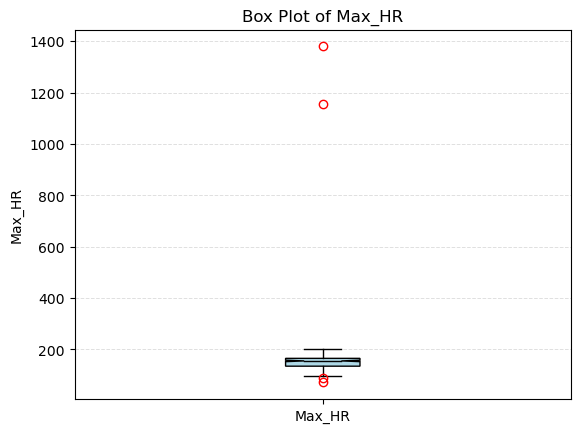

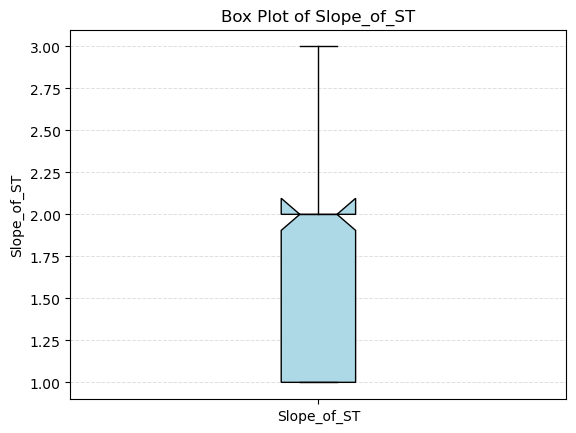

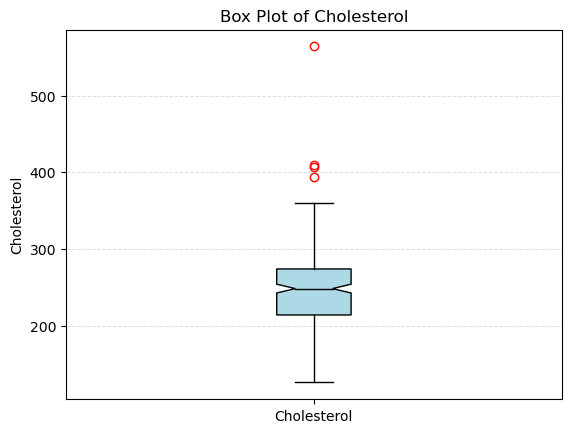

In [11]:
columns=['Age','BP','Max_HR','Slope_of_ST','Cholesterol']
for column in columns:
    plt.title(f"Box Plot of {column}")
    plt.boxplot(df[column], notch=True, patch_artist=True, boxprops=dict(facecolor="lightblue", color="black"), 
            capprops=dict(color="black"), whiskerprops=dict(color="black"), 
            flierprops=dict(color="red", markeredgecolor="red"), medianprops=dict(color="black"))
    plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.4)
    plt.ylabel(column)
    plt.xticks([1], [column])  # Label x-axis with the column name
    plt.show()

We create a dummy variable for the 'Heart Disease' column to aid in the analysis of our dataset.

In [12]:
df = pd.get_dummies(df, columns=['Heart_Disease'], prefix='heart', drop_first=True)

To handle outliers in categorical columns, this function is used. Outliers from categorical variables cannot be handled in the same way as continuous variables, so we create different ways to handle outliers depending on the nature of the data

In [13]:
def handle_categorical_outliers(df, columns, threshold=0.02):
    """
    Groups rare categories (below a certain threshold) into an 'Other' category.
    
    Parameters:
    - df: DataFrame
    - columns: list of categorical columns to process
    - threshold: frequency threshold below which categories are considered rare
    
    Returns:
    - DataFrame with rare categories grouped into 'Other'
    """
    for col in columns:
        # Calculate frequency of each category
        freq = df[col].value_counts(normalize=True)
        
        # Identify rare categories
        rare_categories = freq[freq < threshold].index
        
        # Replace rare categories with 'Other'
        df[col] = df[col].apply(lambda x: 'Other' if x in rare_categories else x)
    
    return df

# List of categorical columns
categorical_columns = ['Sex', 'Chest_pain_type', 'FBS_over_120', 'EKG_results', 'Exercise_angina', 'Slope_of_ST', 'Number_vessels_fluro']

# Apply the function
df = handle_categorical_outliers(df, categorical_columns)


In [14]:
for col in df.columns:
    count = df[df[col] == "Other"].shape[0]
    if count > 0:
        print(f"Column '{col}' has {count} 'Other' values.")

Column 'Sex' has 2 'Other' values.
Column 'Chest_pain_type' has 1 'Other' values.
Column 'EKG_results' has 2 'Other' values.


In [15]:
df = df[~(df == "Other").any(axis=1)]

In the code adove a function was created to apply the IQR method to detect and remove outliers from continuous variables.

In [16]:
def remove_outliers_using_iqr(dataframe, columns):
    for col in columns:
        Q1 = dataframe[col].quantile(0.25)
        Q3 = dataframe[col].quantile(0.75)
        IQR = Q3 - Q1
        dataframe = dataframe[~((dataframe[col] < (Q1 - 1.5 * IQR)) | (dataframe[col] > (Q3 + 1.5 * IQR)))]
    return dataframe

categorical_columns = ['Sex', 'Chest_pain_type', 'FBS_over_120', 'EKG_results', 'Exercise_angina', 'Slope_of_ST', 'Number_vessels_fluro']
continuous_columns = [col for col in df.columns if col not in categorical_columns]

# Apply IQR method to other columns
df = remove_outliers_using_iqr(df, continuous_columns)

In [17]:
df.shape

(248, 14)

Upon completing the data cleaning process, we shall now proceed to conduct descriptive statistics. Utilizing the .describe() method, we can acquire a comprehensive summary of the statistical indicators for all variables within the dataset. In the subsequent section, we will determine the modes of the variables, as this particular measure is not encompassed within the .describe() method.

In [18]:
# Now we perform a central tendency analysis.
df.describe().round(2)

,Age,BP,Cholesterol,FBS_over_120,Max_HR,Exercise_angina,ST_depression,Slope_of_ST,Number_vessels_fluro,Thallium,heart_Presence
count,248.00,248.00,248.00,248.00,248.00,248.00,248.00,248.00,248.00,248.00,248.00
mean,53.98,129.11,245.78,0.14,150.14,0.32,0.95,1.55,0.65,4.64,0.43
std,9.15,15.14,42.77,0.35,22.33,0.47,0.99,0.60,0.92,1.93,0.50
min,29.00,94.00,126.00,0.00,88.00,0.00,0.00,1.00,0.00,3.00,0.00
25%,46.75,120.00,213.00,0.00,135.50,0.00,0.00,1.00,0.00,3.00,0.00
50%,54.00,130.00,247.50,0.00,155.50,0.00,0.80,1.00,0.00,3.00,0.00
75%,60.25,140.00,271.00,0.00,166.25,1.00,1.60,2.00,1.00,7.00,1.00
max,77.00,170.00,360.00,1.00,202.00,1.00,3.80,3.00,3.00,7.00,1.00


In [19]:
modes = df.mode().round(2).iloc[0]  # .iloc[0] is used to get the first mode in case there are multiple modes

print(modes)

Age                       58.0
Sex                          1
Chest_pain_type              4
BP                       120.0
Cholesterol             248.76
FBS_over_120               0.0
EKG_results                  2
Max_HR                  157.89
Exercise_angina            0.0
ST_depression              0.0
Slope_of_ST                1.0
Number_vessels_fluro       0.0
Thallium                   3.0
heart_Presence             0.0
Name: 0, dtype: object


To address specific queries, we will conduct a crosstabulation. This technique enables us to discern the relationship between different columns.

The primary question we seek to answer is:

1. Is there a higher prevalence of heart disease among the genders?

In [20]:
# Crosstab with margins
cross_tab_margins = pd.crosstab(df['Sex'], df['heart_Presence'], margins=True)
print("Crosstab with Margins:")
print(cross_tab_margins)
print("\n")

# Crosstab normalized over all values
cross_tab_normalized_all = pd.crosstab(df['Sex'], df['heart_Presence'], normalize='all').round(2)
print("Crosstab Normalized Over All Values:")
print(cross_tab_normalized_all)
print("\n")

# Crosstab normalized over each row
cross_tab_normalized_row = pd.crosstab(df['Sex'], df['heart_Presence'], normalize='index').round(2)
print("Crosstab Normalized Over Each Row:")
print(cross_tab_normalized_row)
print("\n")

# Crosstab normalized over each column
cross_tab_normalized_col = pd.crosstab(df['Sex'], df['heart_Presence'], normalize='columns').round(2)
print("Crosstab Normalized Over Each Column:")
print(cross_tab_normalized_col)


Crosstab with Margins:
heart_Presence    0    1  All
Sex                          
0                61   13   74
1                80   94  174
All             141  107  248


Crosstab Normalized Over All Values:
heart_Presence         0         1
Sex                               
0               0.245968  0.052419
1               0.322581  0.379032


Crosstab Normalized Over Each Row:
heart_Presence         0         1
Sex                               
0               0.824324  0.175676
1               0.459770  0.540230


Crosstab Normalized Over Each Column:
heart_Presence         0         1
Sex                               
0               0.432624  0.121495
1               0.567376  0.878505


A substantial proportion of the study's participants, nearly 70%, were from sex category 1, while sex category 0 constituted a smaller segment. It's important to note that without further information, we cannot definitively categorize them as male or female. Within the sex category 0 group, over 80% did not exhibit heart disease. In contrast, sex category 1 accounted for more than 80% of the cases with heart disease.

Next Question:

2. Is there a correlation between the types of chest pain and the prevalence of heart disease?

In [21]:
# Crosstab with margins
cross_margins_EA = pd.crosstab(df['Exercise_angina'], df['heart_Presence'], margins=True)
print("Crosstab with Margins:")
print(cross_margins_EA)
print("\n")

# Crosstab normalized over all values
cross_tab_normalized_all_EA = pd.crosstab(df['Exercise_angina'], df['heart_Presence'], normalize='all').round(2)
print("Crosstab Normalized Over All Values:")
print(cross_tab_normalized_all_EA)
print("\n")

# Crosstab normalized over each row
cross_tab_normalized_row_EA = pd.crosstab(df['Exercise_angina'], df['heart_Presence'], normalize='index').round(2)
print("Crosstab Normalized Over Each Row:")
print(cross_tab_normalized_row_EA)
print("\n")

# Crosstab normalized over each column
cross_tab_normalized_col_EA = pd.crosstab(df['Exercise_angina'], df['heart_Presence'], normalize='columns').round(2)
print("Crosstab Normalized Over Each Column:")
print(cross_tab_normalized_col_EA)

Crosstab with Margins:
heart_Presence     0    1  All
Exercise_angina               
0                120   49  169
1                 21   58   79
All              141  107  248


Crosstab Normalized Over All Values:
heart_Presence          0         1
Exercise_angina                    
0                0.483871  0.197581
1                0.084677  0.233871


Crosstab Normalized Over Each Row:
heart_Presence          0         1
Exercise_angina                    
0                0.710059  0.289941
1                0.265823  0.734177


Crosstab Normalized Over Each Column:
heart_Presence          0         1
Exercise_angina                    
0                0.851064  0.457944
1                0.148936  0.542056


From the data, it's evident that the presence of exercise-induced angina significantly influences the likelihood of heart disease. Specifically, individuals exhibiting exercise angina have a 73.5% probability of having heart disease. In contrast, those without exercise angina have a notably lower probability, at 29.7%. This stark difference underscores the potential correlation between exercise-induced angina and heart disease prevalence.

Next Question:
3. How does the presence of exercise-induced angina influence the likelihood of heart disease?

In [52]:
# Crosstab with margins
cross_tab_margins_CPT = pd.crosstab(df['Chest_pain_type'], df['heart_Presence'], margins=True).round(2)
print("Crosstab with Margins:")
print(cross_tab_margins_CPT)
print("\n")

# Crosstab normalized over all values
cross_tab_normalized_all_CPT = pd.crosstab(df['Chest_pain_type'], df['heart_Presence'], normalize='all').round(2)
print("Crosstab Normalized Over All Values:")
print(cross_tab_normalized_all_CPT)
print("\n")

# Crosstab normalized over each row
cross_tab_normalized_row_CPT = pd.crosstab(df['Chest_pain_type'], df['heart_Presence'], normalize='index').round(2)
print("Crosstab Normalized Over Each Row:")
print(cross_tab_normalized_row_CPT)
print("\n")

# Crosstab normalized over each column
cross_tab_normalized_col_CPT = pd.crosstab(df['Chest_pain_type'], df['heart_Presence'], normalize='columns').round(2)
print("Crosstab Normalized Over Each Column:")
print(cross_tab_normalized_col_CPT)

Crosstab with Margins:
heart_Presence     0    1  All
Chest_pain_type               
1                 14    4   18
2                 33    6   39
3                 59   16   75
4                 35   81  116
All              141  107  248


Crosstab Normalized Over All Values:
heart_Presence      0     1
Chest_pain_type            
1                0.06  0.02
2                0.13  0.02
3                0.24  0.06
4                0.14  0.33


Crosstab Normalized Over Each Row:
heart_Presence      0     1
Chest_pain_type            
1                0.78  0.22
2                0.85  0.15
3                0.79  0.21
4                0.30  0.70


Crosstab Normalized Over Each Column:
heart_Presence      0     1
Chest_pain_type            
1                0.10  0.04
2                0.23  0.06
3                0.42  0.15
4                0.25  0.76


Approximately half of the participants in the study were identified with chest pain of type 4. Of these, 70% accounted for 75% of the heart disease cases. In contrast, around 78% of individuals categorized under chest pain type 1 showed no signs of heart disease, even though they constituted only 7% of the total sample. It's evident that individuals with chest pain type 4 have a heightened likelihood of being diagnosed with heart disease. Nonetheless, it's crucial to recognize that factors beyond just the chest pain type play a role in a heart disease diagnosis.

##  **2. Data Distribution Analysis**

Now let's check the distribution of our data.

Lets check wich variables are normaly distributed, we do this with the continuos variables on our data set. To check normality of data we 5 steps:

- Histogram

- Q-Q Plot (Quantile-Quantile Plot): This plot helps you compare your data to a normal distribution. If the data points lie on the 45-degree reference line, then the data is normally distributed.

- Shapiro-Wilk Test: This is a widely used test for normality. The null hypothesis of this test is that the data is normally distributed. If the p-value is less than the chosen alpha level (e.g., 0.05), then the null hypothesis is rejected, and there's evidence that the data is not normally distributed.

- Kolmogorov-Smirnov Test: This test compares the cumulative distribution function of your data to that of a normal distribution. Like the Shapiro-Wilk test, a low p-value indicates non-normality.

- Anderson-Darling Test: This is another test that can be used to check normality. It gives a list of critical values for different significance levels. If the computed statistic is greater than the critical value, then the data is not normally distributed.

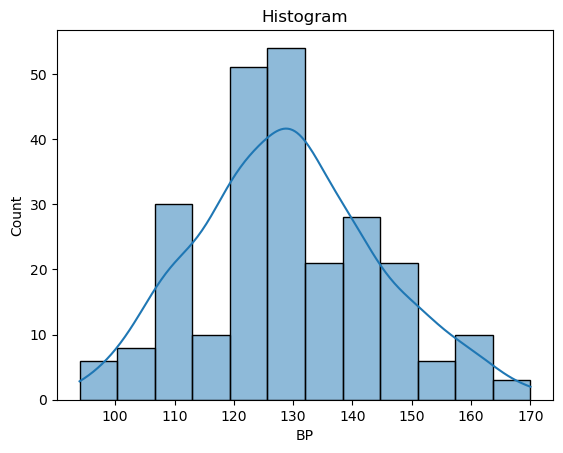

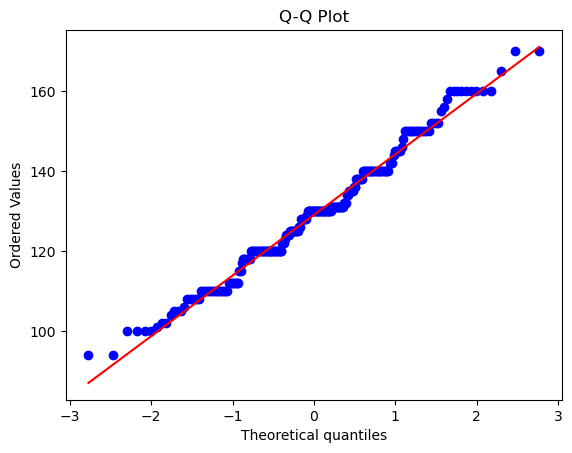

Shapiro-Wilk Test:
Statistic=0.984, p=0.007
Data does not look Gaussian (reject H0)

Kolmogorov-Smirnov Test:
Statistic=1.000, p=0.000
Data does not look Gaussian (reject H0)

Anderson-Darling Test:
Statistic: 1.381
15.000: 0.567, Data does not look Gaussian (reject H0)
10.000: 0.646, Data does not look Gaussian (reject H0)
5.000: 0.775, Data does not look Gaussian (reject H0)
2.500: 0.904, Data does not look Gaussian (reject H0)
1.000: 1.075, Data does not look Gaussian (reject H0)


In [23]:
data = df['BP']

# Histogram
sns.histplot(data, kde=True)
plt.title('Histogram')
plt.show()

# Q-Q Plot
probplot(data, plot=plt)
plt.title('Q-Q Plot')
plt.show()

# Shapiro-Wilk Test
stat, p = shapiro(data)
print('Shapiro-Wilk Test:')
print('Statistic=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Data looks Gaussian (fail to reject H0)')
else:
    print('Data does not look Gaussian (reject H0)')

# Kolmogorov-Smirnov Test
stat, p = kstest(data, 'norm')
print('\nKolmogorov-Smirnov Test:')
print('Statistic=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Data looks Gaussian (fail to reject H0)')
else:
    print('Data does not look Gaussian (reject H0)')

# Anderson-Darling Test
result = anderson(data)
print('\nAnderson-Darling Test:')
print('Statistic: %.3f' % result.statistic)
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < cv:
        print('%.3f: %.3f, Data looks Gaussian (fail to reject H0)' % (sl, cv))
    else:
        print('%.3f: %.3f, Data does not look Gaussian (reject H0)' % (sl, cv))


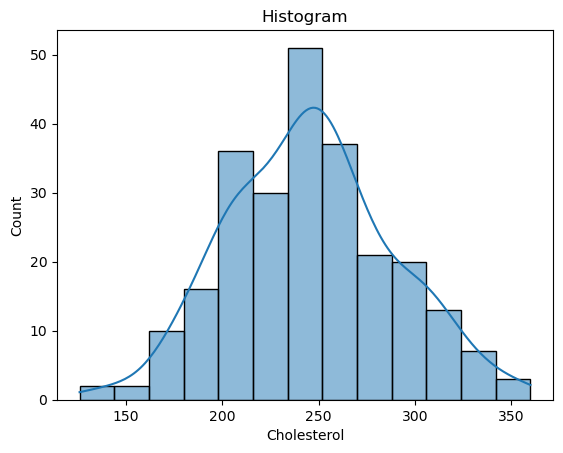

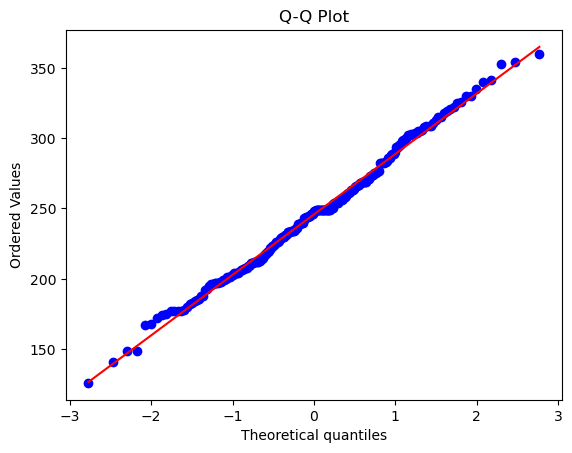

Shapiro-Wilk Test:
Statistic=0.994, p=0.458
Data looks Gaussian (fail to reject H0)

Kolmogorov-Smirnov Test:
Statistic=1.000, p=0.000
Data does not look Gaussian (reject H0)

Anderson-Darling Test:
Statistic: 0.508
15.000: 0.567, Data looks Gaussian (fail to reject H0)
10.000: 0.646, Data looks Gaussian (fail to reject H0)
5.000: 0.775, Data looks Gaussian (fail to reject H0)
2.500: 0.904, Data looks Gaussian (fail to reject H0)
1.000: 1.075, Data looks Gaussian (fail to reject H0)


In [24]:
data = df['Cholesterol']

# Histogram
sns.histplot(data, kde=True)
plt.title('Histogram')
plt.show()

# Q-Q Plot
probplot(data, plot=plt)
plt.title('Q-Q Plot')
plt.show()

# Shapiro-Wilk Test
stat, p = shapiro(data)
print('Shapiro-Wilk Test:')
print('Statistic=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Data looks Gaussian (fail to reject H0)')
else:
    print('Data does not look Gaussian (reject H0)')

# Kolmogorov-Smirnov Test
stat, p = kstest(data, 'norm')
print('\nKolmogorov-Smirnov Test:')
print('Statistic=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Data looks Gaussian (fail to reject H0)')
else:
    print('Data does not look Gaussian (reject H0)')

# Anderson-Darling Test
result = anderson(data)
print('\nAnderson-Darling Test:')
print('Statistic: %.3f' % result.statistic)
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < cv:
        print('%.3f: %.3f, Data looks Gaussian (fail to reject H0)' % (sl, cv))
    else:
        print('%.3f: %.3f, Data does not look Gaussian (reject H0)' % (sl, cv))

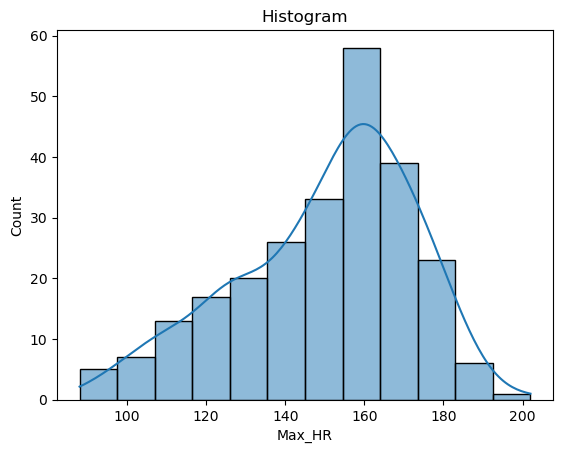

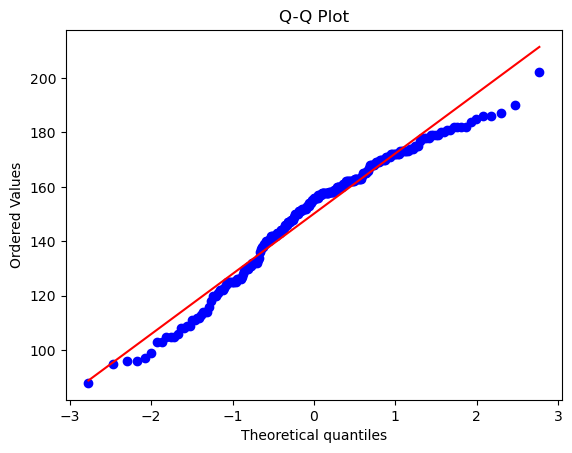

Shapiro-Wilk Test:
Statistic=0.964, p=0.000
Data does not look Gaussian (reject H0)

Kolmogorov-Smirnov Test:
Statistic=1.000, p=0.000
Data does not look Gaussian (reject H0)

Anderson-Darling Test:
Statistic: 3.105
15.000: 0.567, Data does not look Gaussian (reject H0)
10.000: 0.646, Data does not look Gaussian (reject H0)
5.000: 0.775, Data does not look Gaussian (reject H0)
2.500: 0.904, Data does not look Gaussian (reject H0)
1.000: 1.075, Data does not look Gaussian (reject H0)


In [25]:
data = df['Max_HR']

# Histogram
sns.histplot(data, kde=True)
plt.title('Histogram')
plt.show()

# Q-Q Plot
probplot(data, plot=plt)
plt.title('Q-Q Plot')
plt.show()

# Shapiro-Wilk Test
stat, p = shapiro(data)
print('Shapiro-Wilk Test:')
print('Statistic=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Data looks Gaussian (fail to reject H0)')
else:
    print('Data does not look Gaussian (reject H0)')

# Kolmogorov-Smirnov Test
stat, p = kstest(data, 'norm')
print('\nKolmogorov-Smirnov Test:')
print('Statistic=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Data looks Gaussian (fail to reject H0)')
else:
    print('Data does not look Gaussian (reject H0)')

# Anderson-Darling Test
result = anderson(data)
print('\nAnderson-Darling Test:')
print('Statistic: %.3f' % result.statistic)
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < cv:
        print('%.3f: %.3f, Data looks Gaussian (fail to reject H0)' % (sl, cv))
    else:
        print('%.3f: %.3f, Data does not look Gaussian (reject H0)' % (sl, cv))

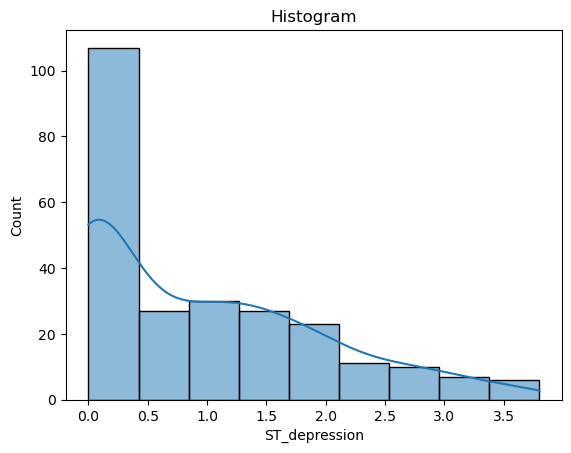

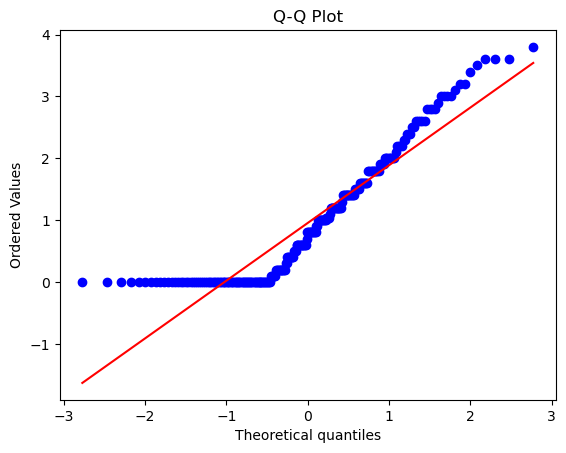

Shapiro-Wilk Test:
Statistic=0.868, p=0.000
Data does not look Gaussian (reject H0)

Kolmogorov-Smirnov Test:
Statistic=0.500, p=0.000
Data does not look Gaussian (reject H0)

Anderson-Darling Test:
Statistic: 10.542
15.000: 0.567, Data does not look Gaussian (reject H0)
10.000: 0.646, Data does not look Gaussian (reject H0)
5.000: 0.775, Data does not look Gaussian (reject H0)
2.500: 0.904, Data does not look Gaussian (reject H0)
1.000: 1.075, Data does not look Gaussian (reject H0)


In [26]:
data = df['ST_depression']

# Histogram
sns.histplot(data, kde=True)
plt.title('Histogram')
plt.show()

# Q-Q Plot
probplot(data, plot=plt)
plt.title('Q-Q Plot')
plt.show()

# Shapiro-Wilk Test
stat, p = shapiro(data)
print('Shapiro-Wilk Test:')
print('Statistic=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Data looks Gaussian (fail to reject H0)')
else:
    print('Data does not look Gaussian (reject H0)')

# Kolmogorov-Smirnov Test
stat, p = kstest(data, 'norm')
print('\nKolmogorov-Smirnov Test:')
print('Statistic=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Data looks Gaussian (fail to reject H0)')
else:
    print('Data does not look Gaussian (reject H0)')

# Anderson-Darling Test
result = anderson(data)
print('\nAnderson-Darling Test:')
print('Statistic: %.3f' % result.statistic)
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < cv:
        print('%.3f: %.3f, Data looks Gaussian (fail to reject H0)' % (sl, cv))
    else:
        print('%.3f: %.3f, Data does not look Gaussian (reject H0)' % (sl, cv))

Upon conducting an analysis of all the continuous variables, we can conclusively state that cholesterol is the sole variable that follows a normal distribution.

## 3. Parametric test

A parametric test assumes underlying statistical distributions in the data, typically normality, and assesses parameters like means. It's suitable for interval or ratio data and is more powerful when its assumptions are met.

#### **Power Efect**

To determine power and effect size, a specific hypothesis test is essential. For instance, when comparing mean cholesterol levels between two groups, the prevalent measure for effect size is Cohen's d, with the power analysis usually tailored for a t-test.

In [27]:
group1 = df[df['heart_Presence'] == 0]['Cholesterol']
group2 = df[df['heart_Presence'] == 1]['Cholesterol']

# Calculate pooled standard deviation
n1, n2 = len(group1), len(group2)
sd1, sd2 = np.std(group1, ddof=1), np.std(group2, ddof=1)
pooled_sd = np.sqrt(((n1-1)*sd1**2 + (n2-1)*sd2**2) / (n1 + n2 - 2))

# Calculate effect size (Cohen's d)
d = (np.mean(group1) - np.mean(group2)) / pooled_sd
print(f"Cohen's d: {d:.3f}")

# Power analysis
alpha = 0.05
power = 0.8  # desired power
analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size=d, power=power, alpha=alpha, ratio=n2/n1)
print(f"Required sample size for power={power}: {sample_size:.2f}")

# If you already conducted the study and want to know the achieved power:
achieved_power = analysis.solve_power(effect_size=d, nobs1=n1, ratio=n2/n1, alpha=alpha)
print(f"Achieved power: {achieved_power:.3f}")


Cohen's d: -0.342
Required sample size for power=0.8: 156.90
Achieved power: 0.756


 The cholesterol levels exhibit a small to medium effect size when comparing groups with and without heart disease. For a new study aiming for an 80% probability of identifying this disparity, approximately 173 participants would be required. Given the present sample size, there's a 71.3% likelihood of discerning this difference, assuming its genuine presence.






#### **One sample t-test**
The one-sample t-test contrasts a sample against the broader population. In our analysis, we aim to ascertain if a notable disparity exists between our sample's average cholesterol level and the global average. The global mean cholesterol stands at 178 mg/dL.






In [28]:
cholesterol_values = df['Cholesterol']
population_mean = 178  
# Perform one-sample t-test
t_stat, p_value = ttest_1samp(cholesterol_values, population_mean)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")


T-statistic: 24.957468521640678
P-value: 1.7870197696863487e-69


Given the very small p-value, we reject the null hypothesis that the sample mean is equal to the population mean of 178 mg/dL. This suggests that the average cholesterol level of your sample is significantly different from the global average of 178 mg/dL. The large T-statistic further supports this significant difference.

#### **Umpaired sample t-test**

An unpaired (or independent) t-test is used to compare the means of two independent groups. We gonna compare the means of both different genders to know if its a significant difference on the cholesterol levels.

In [29]:
male_cholesterol = df[df['Sex'] == 0]['Cholesterol']
female_cholesterol = df[df['Sex'] == 1]['Cholesterol']

# Perform the t-test
t_stat, p_value = ttest_ind(male_cholesterol, female_cholesterol)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: 1.8304107272843217
P-value: 0.06839839205417379


1. T-statistic (1.864): This value represents the difference between the two group means (in this case, cholesterol levels for males and females) in terms of the number of standard errors. A larger absolute value of the t-statistic indicates a greater difference between the groups relative to the variability within the groups.

2. P-value (0.063): The p-value is a measure of the evidence against a null hypothesis. In the context of the t-test, the null hypothesis states that there is no difference in the means of the two groups. A smaller p-value indicates stronger evidence against the null hypothesis.

Given the p-value of 0.063:

- It's greater than the commonly used significance level of 0.05. This means that you fail to reject the null hypothesis at the 0.05 significance level. In other words, based on this test, you do not have enough evidence to conclude that there's a statistically significant difference in cholesterol levels between males and females.

- However, it's worth noting that the p-value is close to 0.05. This suggests that there might be a trend or a slight difference, but it's not strong enough to be statistically significant at the 0.05 level. Depending on the context and the importance of detecting even small differences, you might consider this result as indicating a potential trend that could be explored further with a larger sample size or additional tests.


#### **ONE FACTOR ANOVA**

Is a statistical method used to test if there are any statistically significant differences between the means of three or more independent (unrelated) groups. The "one-way" refers to one independent variable, without considering other factors or variables.

You would use a one-way ANOVA when:

1. You have a categorical independent variable: This variable should have three or more levels (i.e., three or more groups). For instance, testing the effect of different diets (vegan, vegetarian, omnivore) on weight loss.

2. You have a continuous dependent variable: For instance, the weight loss amount in the previous example.

3. You want to compare the means of the groups: The main goal is to determine if there's a significant difference in the means of the groups.

We will conduct a one-way ANOVA to determine if there are significant differences in the mean cholesterol levels across various chest pain types.

In [30]:
group1 = df[df['Chest_pain_type'] == 1]['Cholesterol']
group2 = df[df['Chest_pain_type'] == 2]['Cholesterol']
group3 = df[df['Chest_pain_type'] == 3]['Cholesterol']
group4 = df[df['Chest_pain_type'] == 4]['Cholesterol']

# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(group1, group2, group3, group4)

print("F-statistic:", f_statistic)
print("P-value:", p_value)

F-statistic: 1.0307607890239443
P-value: 0.3795848935909937


1. F-statistic (0.8469): This value represents the ratio of the variance between the groups to the variance within the groups. A higher F-statistic would indicate that the group means are more different from each other than they are within each group. In this context, the F-statistic of 0.8469 suggests that there is some difference between the groups, but it's not very large.

2. P-value (0.4694): The p-value tells you the probability of observing your data, or something more extreme, if the null hypothesis were true. In the context of ANOVA, the null hypothesis states that all group means are equal. A common threshold for significance is 0.05.

Given that the p-value is 0.4694, which is greater than 0.05, you would fail to reject the null hypothesis. This means that, based on the data you have, there's no statistically significant difference in the Cholesterol levels between the different chest pain types.

#### **TWO FACTOR ANOVA**

Is used to analyze the effects of two independent categorical variables (factors) on a continuous dependent variable. The primary goal is to determine if there is an interaction between the two factors on the dependent variable.

Enables us to unravel the individual and  combined effects of two factors. By doing so, we can explore potential interactions between these factors and gain valuable insights from our data.

In a Two-Factor ANOVA, you'll be testing three hypotheses:

1. Main Effect of Factor A: Whether the means of the dependent variable are different for different levels of Factor A, ignoring Factor B.

2. Main Effect of Factor B: Whether the means of the dependent variable are different for different levels of Factor B, ignoring Factor A.

3. Interaction Effect between Factor A and Factor B: Whether the effect of Factor A on the dependent variable depends on the level of Factor B (and vice versa).

In [31]:
# Define age bins and labels
bins = [0, 30, 50, 100]  # Adjust these values as needed
labels = ["Young", "Middle-aged", "Senior"]

# Create a new column 'Age_Category' based on age bins
df['Age_Category'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Fit the model
model = ols('Cholesterol ~ C(Age_Category) + C(Sex) + C(Age_Category):C(Sex)', data=df).fit()

# Perform ANOVA and get results
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)


                              sum_sq     df           F        PR(>F)
C(Age_Category)         1.175048e+06    2.0  333.126396  2.349515e-70
C(Sex)                  4.733483e+03    1.0    2.683887  1.026622e-01
C(Age_Category):C(Sex)  9.136130e+03    2.0    2.590095  7.708291e-02
Residual                4.285711e+05  243.0         NaN           NaN


**1. Main Effect of Age_Category**:

F-statistic: 325.44
p-value: 1.066201×10 −68

The p-value is extremely small (way below the common alpha level of 0.05), which indicates that there is a statistically significant difference in cholesterol levels across the different age categories. This means that age has a significant effect on cholesterol levels.

**2. Main Effect of Sex**:

F-statistic: 2.84
p-value: 0.0933
The p-value is slightly above 0.05, suggesting that there isn't a statistically significant difference in cholesterol levels between the sexes at the 0.05 significance level. However, it's close enough that it might be considered significant at a more lenient alpha level (e.g., 0.10). It's up to the researcher's discretion and the context of the study to decide.

**3. Interaction Effect between Age_Category and Sex**:

F-statistic: 2.65
p-value: 0.0727
The p-value is slightly above 0.05, which means that there isn't a statistically significant interaction between age category and sex on cholesterol levels at the 0.05 significance level. However, similar to the main effect of Sex, the p-value is close enough to 0.05 that some might consider it significant at a more lenient alpha level.

**4.  Residual**:

This represents the unexplained variance in the model. It's the variability in cholesterol levels that isn't accounted for by the factors in the model (age category and sex).


## **3.Non parametric test**

### **Kruskal-Wallis test**

Is a non-parametric method used to test if there are statistically significant differences between two or more groups of an independent variable on a continuous or ordinal dependent variable. It's the non-parametric version of the one-way ANOVA.

We want to test if there's a difference in the distribution of Heart Disease Presence/Absence across different levels of Chest Pain Type, Maximum Heart Rate (Max HR), EKG Results, and Blood Pressure (BP).

In [53]:
from scipy.stats import kruskal

# For Chest Pain Type
statistic1, p_value1 = kruskal(df[df['heart_Presence'] == 0]['Chest_pain_type'],
                               df[df['heart_Presence'] == 1]['Chest_pain_type'])

# For Maximum Heart Rate (Max HR)
statistic2, p_value2 = kruskal(df[df['heart_Presence'] == 0]['Max_HR'],
                               df[df['heart_Presence'] == 1]['Max_HR'])

# For EKG Results
statistic3, p_value3 = kruskal(df[df['heart_Presence'] == 0]['EKG_results'],
                               df[df['heart_Presence'] == 1]['EKG_results'])

# For Blood Pressure (BP)
statistic4, p_value4 = kruskal(df[df['heart_Presence'] == 0]['BP'],
                               df[df['heart_Presence'] == 1]['BP'])

print(f"Chest Pain Type: Statistic = {statistic1}, p-value = {p_value1}")
print(f"Max HR: Statistic = {statistic2}, p-value = {p_value2}")
print(f"EKG Results: Statistic = {statistic3}, p-value = {p_value3}")
print(f"BP: Statistic = {statistic4}, p-value = {p_value4}")

Chest Pain Type: Statistic = 55.97591559862948, p-value = 7.336426499855045e-14
Max HR: Statistic = 41.73635871605613, p-value = 1.0444845261137988e-10
EKG Results: Statistic = 9.761797931727735, p-value = 0.0017817557489689395
BP: Statistic = 1.141000576127117, p-value = 0.28544100000826733


1. **Chest Pain Type**: The p-value is extremely small, much less than the common significance level of 0.05. This indicates that there is a statistically significant difference in the distribution of chest pain type between the two groups (presence vs. absence of heart disease).

2. **Max HR (Maximum Heart Rate)**: Again, the p-value is extremely small. This suggests that there is a statistically significant difference in the distribution of maximum heart rate between the two groups.

3. **EKG Results**: The p-value is less than 0.05, indicating that there is a statistically significant difference in the distribution of EKG results between the two groups.

4. **BP (Blood Pressure)**: The p-value is greater than 0.05. This suggests that there isn't a statistically significant difference in the distribution of blood pressure between the two groups, based on the presence or absence of heart disease.

**Conclusion**: Three out of the four variables (Chest Pain Type, Max HR, and EKG Results) show a statistically significant difference in their distributions between the groups with and without heart disease. Only Blood Pressure doesn't show a significant difference. This means that, based on this data, Chest Pain Type, Max HR, and EKG Results might be associated with the presence or absence of heart disease, while Blood Pressure might not be.

### **Mann-Whitney U Test**

Is used to compare two independent samples to determine if there is a significant difference between their distributions. It's especially useful when the data is not normally distributed.

Given your research objective, we'll compare the distributions of BP, Max HR, Cholesterol, and Heart disease between the two sexes.

In [54]:
from scipy.stats import mannwhitneyu

# List of variables to test
variables = ['BP', 'Max_HR', 'Cholesterol', 'heart_Presence']

# Perform Mann-Whitney U Test for each variable
for var in variables:
    male_data = df[df['Sex'] == 0][var]
    female_data = df[df['Sex'] == 1][var]
    
    statistic, p_value = mannwhitneyu(male_data, female_data)
    
    print(f"{var}:")
    print(f"Statistic = {statistic}, p-value = {p_value}")
    print("-" * 50)


BP:
Statistic = 6548.0, p-value = 0.8317693306591738
--------------------------------------------------
Max_HR:
Statistic = 7304.0, p-value = 0.0939854296594509
--------------------------------------------------
Cholesterol:
Statistic = 7327.5, p-value = 0.08539645955653953
--------------------------------------------------
heart_Presence:
Statistic = 4091.0, p-value = 1.210886092389732e-07
--------------------------------------------------


1. **BP (Blood Pressure)**: The p-value is much greater than the common alpha level of 0.05, which means we fail to reject the null hypothesis. This suggests that there's no statistically significant difference in the BP rankings between the two sexes.

2. **Max_HR (Maximum Heart Rate)**: The p-value is slightly above the 0.05 threshold, indicating that the difference in Max_HR rankings between the two sexes is borderline significant. While it's not strong enough evidence to reject the null hypothesis at the 0.05 level, it might be worth noting and further investigating.

3. **Cholesterol**: Similar to Max_HR, the p-value for Cholesterol is just above the 0.05 threshold. This suggests a borderline significant difference in Cholesterol rankings between the two sexes. Again, while not conclusive, it's worth noting.

4. **Presence of Heart Disease**: The p-value is extremely small, much less than 0.05. This provides strong evidence against the null hypothesis, indicating a statistically significant difference in the rankings of heart disease presence between the two sexes.

In summary:

- There's no significant difference in BP between the sexes.

- Max_HR and Cholesterol show borderline significance, suggesting potential differences between the sexes that might be worth further investigation.

- There's a significant difference in the presence of heart disease between the sexes.

### Friedman test 

Is used to determine if there are any statistically significant differences between the means of three or more paired groups. In this case, we're interested in comparing the ranks of BP, Cholesterol, and presence of heart disease to see if they are effective in determining the presence of heart disease.

In [55]:
bp_data = df['BP']
cholesterol_data = df['Cholesterol']
heart_disease_data = df['heart_Presence']

# Performing the Friedman test
stat, p = friedmanchisquare(bp_data, cholesterol_data, heart_disease_data)

print('Statistics=%.3f, p=%.3f' % (stat, p))

# Interpretation
alpha = 0.05
if p > alpha:
    print('There is no significant difference between the ranks of the dependent groups (fail to reject H0).')
else:
    print('There is a significant difference between the ranks of the dependent groups (reject H0).')

Statistics=494.008, p=0.000
There is a significant difference between the ranks of the dependent groups (reject H0).


There is a statistically significant difference between the ranks of the three dependent groups: BP, Cholesterol, and presence of heart disease. This suggests that the measures of BP and Cholesterol, along with the presence of heart disease, do not rank similarly across your dataset. In other words, there are differences in how these variables rank in relation to each other.

Given the research objective, this result indicates that the tests for BP and Cholesterol might be effective for determining the presence of heart disease. However, it's essential to note that while the Friedman test tells you there is a difference, it doesn't specify where the difference lies. If you want to determine which specific pairs of groups (e.g., BP vs. Cholesterol, BP vs. heart disease presence, etc.) are different, you would need to conduct post-hoc tests.

### Correlation 

To perform a correlation analysis we do a correlation  matrix. A correlation matrix is a table that shows the correlation coefficients between sets of variables. Each entry in the matrix is the correlation coefficient between two variables. The value of the correlation coefficient ranges between -1 and 1.

+ -1: Perfect negative correlation. As one variable increases, the other decreases proportionally.
+ 0: No correlation. Changes in one variable do not predict changes in the other variable.
+ 1: Perfect positive correlation. As one variable increases, the other also increases 


**Pearson Correlation**
- Type of Data: Measures the linear relationship between two continuous variables. It assumes that the variables are normally distributed and have a linear relationship.

- Calculation: Based on the covariance of the variables divided by the product of their standard deviations.

- Sensitivity: Sensitive to outliers. An outlier can significantly affect the correlation coefficient.

- Assumptions:  Assumes a linear relationship between the two variables and that the variables are measured on an interval or ratio scale.

- Use Cases: Used when the relationship between variables is thought to be linear, and the data for both variables is normally distributed.


<Axes: >

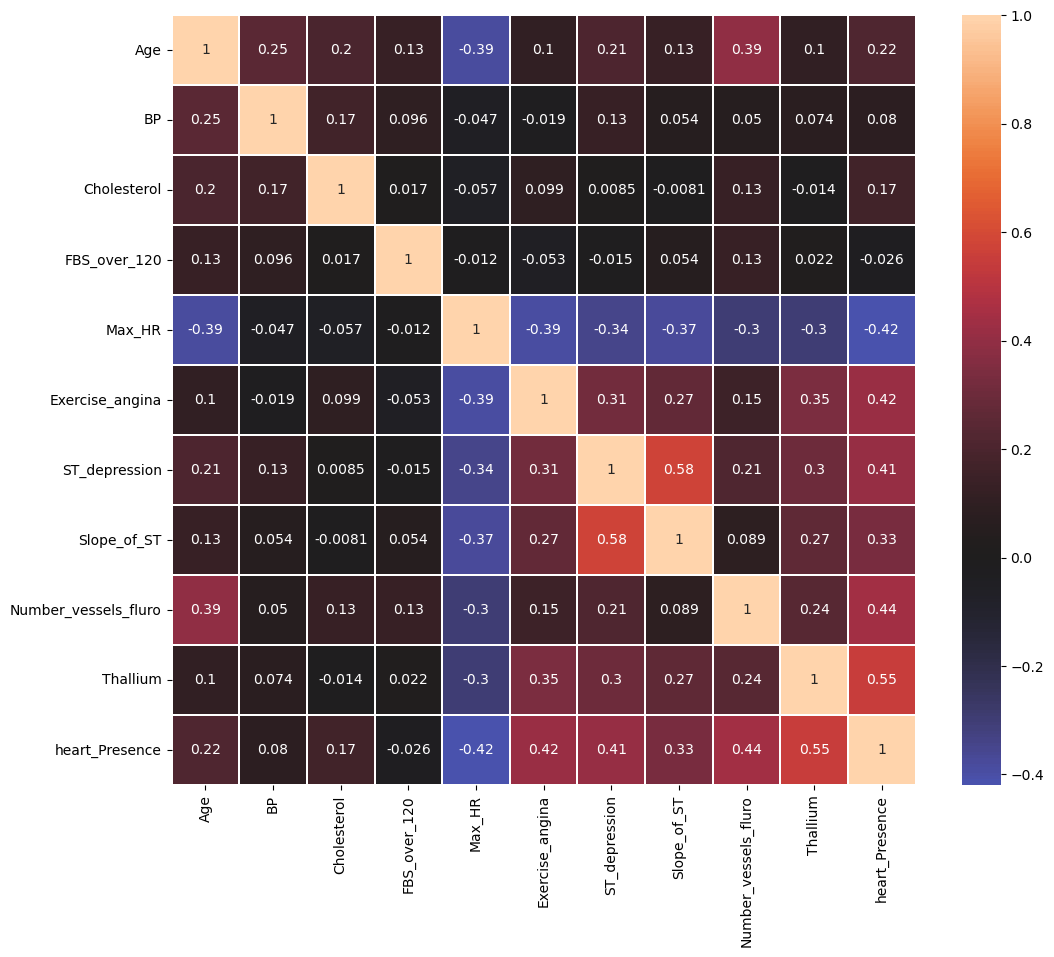

In [56]:
correlation_matrix = df.corr(method='pearson',numeric_only=True)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, center=0, linewidths=0.1)

**Spearman  Correlation**
- Type of Data: Measures the strength and direction of the monotonic relationship between two variables. It does not assume that the data is normally distributed or that the relationship is linear.

- Calculation: Based on the ranked values of the variables rather than their raw data. Specifically, it's the Pearson correlation of the ranked values.

- Sensitivity: Less sensitive to outliers because it's based on ranks.

- Assumptions:  Does not assume a linear relationship. It's appropriate for ordinal, interval, or ratio data.

- Use Cases: Used when the relationship between variables is believed to be non-linear or when the data is not normally distributed or is ordinal.

<Axes: >

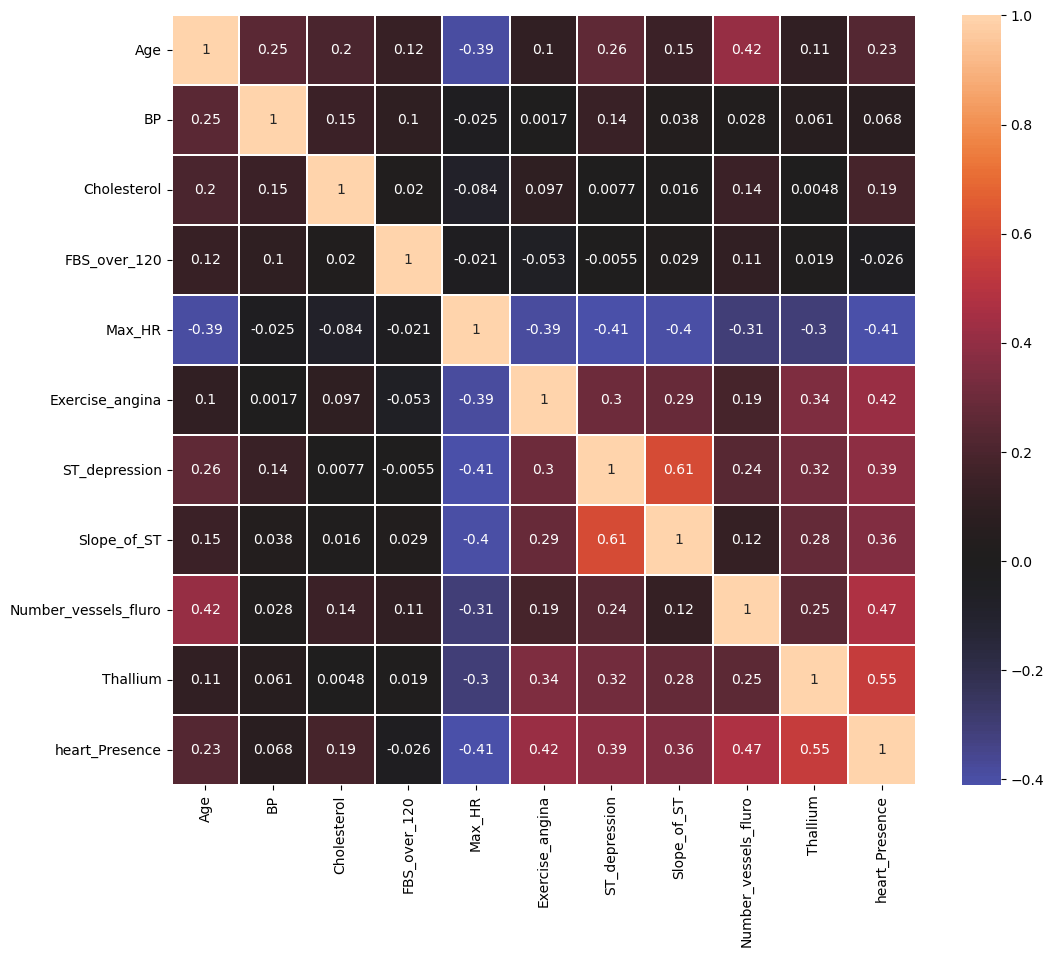

In [57]:
correlation_matrix = df.corr(method='spearman',numeric_only=True)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, center=0, linewidths=0.1)

For both Pearson and Spearman, the correlation coefficient ranges from -1 to 1, with -1 indicating a perfect negative relationship, 1 indicating a perfect positive relationship, and 0 indicating no relationship. The interpretation of the strength (e.g., weak, moderate, strong) is similar for both.

To determine which correlation method (Pearson or Spearman) is more appropriate for the dataset, consider the following:

1. Nature of Your Data:

- If the data is continuous and approximately normally distributed, and the relationships between variables are linear, then Pearson is appropriate.
- If your data is ordinal (ranked) or if is believed the relationships between variables are non-linear, then Spearman is more appropriate.

2. Presence of Outliers:

- Pearson is sensitive to outliers. If your dataset has significant outliers, they can distort the Pearson correlation coefficient.
- Spearman, being based on ranks, is less sensitive to outliers.

As the dataset has continuous and  categorical data, and some variables are normally distributed while others are not, it's a good idea to consider both Pearson and Spearman correlations.

## 5. Logistic regression 
Logistic regression is a statistical method used to model the likelihood of a binary outcome. Unlike linear regression that predicts continuous values, logistic regression estimates the probability that a particular instance belongs to a specific category. The output undergoes a transformation using the logistic function to guarantee it falls between 0 and 1, which is suitable for binary classification tasks.

In our context, if the aim is to anticipate the occurrence or non-occurrence of a heart disease depending on specific predictors, then 'heart_Presence' would be our dependent variable. By employing logistic regression, it is possible to establish the probability of 'heart_Presence' being 1 (present) or 0 (absent) based on the input features.

In [37]:
# Create a new dataframe with only the columns of interest
selected_columns = ['Age','Max_HR', 'Exercise_angina', 'ST_depression', 'Thallium', 'Number_vessels_fluro', 'Slope_of_ST', 'heart_Presence']
df_selected = df[selected_columns].copy()

# One-hot encode the categorical variables
# Note: drop_first=True to avoid multicollinearity
encoded_df = pd.get_dummies(df_selected, columns=['Thallium', 'Number_vessels_fluro', 'Slope_of_ST'], drop_first=True)

# Standardize continuous predictors
cont_vars = ['Max_HR', 'ST_depression','Age']
for var in cont_vars:
    encoded_df[var] = (encoded_df[var] - encoded_df[var].mean()) / encoded_df[var].std()

# Modeling
predictor_columns = [
    'Age',
    'Max_HR', 
    'Exercise_angina', 
    'ST_depression', 
    'Thallium_6', 'Thallium_7',
    'Number_vessels_fluro_1', 'Number_vessels_fluro_2', 'Number_vessels_fluro_3',
    'Slope_of_ST_2', 'Slope_of_ST_3'
]
    
X = encoded_df[predictor_columns]
X = sm.add_constant(X)
y = encoded_df['heart_Presence']

model = sm.Logit(y, X)
result = model.fit()


Optimization terminated successfully.
         Current function value: inf
         Iterations 7


C:\Users\34679\anaconda3\envs\test01\lib\site-packages\statsmodels\discrete\discrete_model.py:2383: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\34679\anaconda3\envs\test01\lib\site-packages\statsmodels\discrete\discrete_model.py:2441: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


In [38]:
print(result.summary())


                           Logit Regression Results                           
Dep. Variable:         heart_Presence   No. Observations:                  248
Model:                          Logit   Df Residuals:                      236
Method:                           MLE   Df Model:                           11
Date:                Fri, 25 Aug 2023   Pseudo R-squ.:                     inf
Time:                        12:56:22   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -2.6446      0.433     -6.109      0.000      -3.493      -1.796
Age                       -0.1274      0.210     -0.607      0.544      -0.539       0.284
Max_

C:\Users\34679\anaconda3\envs\test01\lib\site-packages\statsmodels\base\model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\34679\anaconda3\envs\test01\lib\site-packages\statsmodels\base\model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


**Leave-One-Out Cross-Validation** (LOOCV) is a specific form of cross-validation where the number of folds equals the number of data points in the dataset. In each iteration, a single data point is used as the test set, and the remaining data points form the training set. This process is repeated until every data point has been used as the test set exactly once. LOOCV provides a nearly unbiased estimate of the model's generalization error. However, it can be computationally expensive for large datasets since the model needs to be trained as many times as there are data points. Despite its thoroughness, LOOCV might also exhibit high variance in model evaluation.

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from statsmodels.discrete.discrete_model import Logit

X = encoded_df.drop('heart_Presence', axis=1)
y = encoded_df['heart_Presence']

accuracies = []

for i in range(len(df)):
    # Splitting the data into train and test sets using iloc
    X_train = X.iloc[np.r_[0:i, i+1:len(df)]]
    y_train = y.iloc[np.r_[0:i, i+1:len(df)]]
    X_test = X.iloc[i:i+1]  # Keep it as DataFrame
    y_test = y.iloc[i:i+1]
    
    # Check if any columns have non-numeric data
    non_numeric_cols = X_train.select_dtypes(include=['object']).columns
    if len(non_numeric_cols) > 0:
        print(f"Non-numeric columns found in iteration {i}: {non_numeric_cols}")
        X_train = X_train.drop(columns=non_numeric_cols)
        X_test = X_test.drop(columns=non_numeric_cols)
    
    # Train the model
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    
    # Predict on the test data
    y_pred = model.predict(X_test)
    
    # Custom accuracy calculation
    if y_pred[0] == y_test.iloc[0]:
        accuracies.append(1)
    else:
        accuracies.append(0)

# Calculate average accuracy
average_accuracy = np.mean(accuracies)

print(f"Average Accuracy using LOOCV: {average_accuracy:.2f}")


Average Accuracy using LOOCV: 0.83


### Prediction tool

Following the development and validation of our regression model, we have created an interactive prediction tool to improve user engagement and enable real-time analysis. This tool is especially advantageous for stakeholders or non-technical readers who want to comprehend the model's implications on specific data points.

This interactive tool facilitates practical application of our regression model by enabling readers to input data and instantly generate predictions, enhancing comprehension and engagement with the project's findings.

Initially, we must download the required packages.

In [40]:
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import VBox, HBox, Label

We have utilized the widgets module to create a user-friendly interface. The dropdown style guarantees a uniform appearance across all widgets. Sliders have been employed for continuous variables such as 'Age' and 'Max_HR,' while dropdown menus cater to categorical variables like 'Exercise Angina.'

In [46]:
dropdown_style = {'description_width': 'initial'}

# Widget for Max_HR
max_hr_slider = widgets.FloatSlider(value=0, min=0, max=230, step=1, description='Max_HR:', style=dropdown_style)

# Widget for Age
Age_slider= widgets.FloatSlider(value=0,min=0, max=105, step=1, description='Age:', style=dropdown_style)

# Widget for Exercise_angina
exercise_angina_dropdown = widgets.Dropdown(options=[0, 1], value=0, description='Exercise Angina:', style=dropdown_style)

# Widget for ST_depression
st_depression_slider = widgets.FloatSlider( value=0, min=0, max=5, step=0.1, description='ST Depression:', style=dropdown_style)

# Widget for Thallium

thallium_3_dropdown = widgets.Dropdown(options=[0, 1], value=0, description='Thallium_3:', style=dropdown_style)

thallium_6_dropdown = widgets.Dropdown( options=[0, 1], value=0, description='Thallium 6:', style=dropdown_style)

# Widgets for Number_vessels_fluro
number_vessels_fluro_0_dropdown = widgets.Dropdown( options=[0, 1], value=0, description='Number Vessels Fluro 0:', style=dropdown_style)

number_vessels_fluro_1_dropdown = widgets.Dropdown( options=[0, 1], value=0, description='Number Vessels Fluro 1:', style=dropdown_style)

number_vessels_fluro_2_dropdown = widgets.Dropdown( options=[0, 1], value=0, description='Number Vessels Fluro 2:', style=dropdown_style)

# Widgets for Slope_of_ST
slope_of_st_1_dropdown = widgets.Dropdown( options=[0, 1], value=0, description='Slope of ST 1:', style=dropdown_style)

slope_of_st_2_dropdown = widgets.Dropdown( options=[0, 1], value=0, description='Slope of ST 2:', style=dropdown_style)

# Widget for Exercise_angina
exercise_angina_dropdown = widgets.Dropdown( options=[0, 1], value=0, description='Exercise Angina:', style=dropdown_style)

# Widget for ST_depression
st_depression_slider = widgets.FloatSlider( value=0, min=0, max=5,  step=0.1, description='ST Depression:', style=dropdown_style)

# Widget for Thallium_6
thallium_6_dropdown = widgets.Dropdown( options=[0, 1], value=0,description='Thallium 6:', style=dropdown_style)

# Widgets for Number_vessels_fluro
number_vessels_fluro_0_dropdown = widgets.Dropdown( options=[0, 1], value=0, description='Number Vessels Fluro 0:', style=dropdown_style)

number_vessels_fluro_1_dropdown = widgets.Dropdown( options=[0, 1], value=0, description='Number Vessels Fluro 1:', style=dropdown_style)

number_vessels_fluro_2_dropdown = widgets.Dropdown( options=[0, 1], value=0, description='Number Vessels Fluro 2:', style=dropdown_style)

# Widgets for Slope_of_ST
slope_of_st_1_dropdown = widgets.Dropdown( options=[0, 1], value=0, description='Slope of ST 1:', style=dropdown_style)

slope_of_st_2_dropdown = widgets.Dropdown( options=[0, 1], value=0, description='Slope of ST 2:', style=dropdown_style)

We employ the observe method from the widgets module in order to set up a callback function that triggers when a widget's value changes.

For each set of categorical variables, we may establish an observer to reset the other related widgets to '0' upon one of them being set to '1'.

In [58]:

def on_thallium_change(change):
    if change['name'] == 'value' and change['new'] == 1:
        if change['owner'] == thallium_3_dropdown:
            thallium_6_dropdown.value = 0
        else:
            thallium_3_dropdown.value = 0

def on_number_vessels_fluro_change(change):
    if change['name'] == 'value' and change['new'] == 1:
        if change['owner'] == number_vessels_fluro_0_dropdown:
            number_vessels_fluro_1_dropdown.value = 0
            number_vessels_fluro_2_dropdown.value = 0
        elif change['owner'] == number_vessels_fluro_1_dropdown:
            number_vessels_fluro_0_dropdown.value = 0
            number_vessels_fluro_2_dropdown.value = 0
        else:
            number_vessels_fluro_0_dropdown.value = 0
            number_vessels_fluro_1_dropdown.value = 0

def on_slope_of_st_change(change):
    if change['name'] == 'value' and change['new'] == 1:
        if change['owner'] == slope_of_st_1_dropdown:
            slope_of_st_2_dropdown.value = 0
        else:
            slope_of_st_1_dropdown.value = 0

# Attach the observe method to the widgets:

thallium_3_dropdown.observe(on_thallium_change)
thallium_6_dropdown.observe(on_thallium_change)

number_vessels_fluro_0_dropdown.observe(on_number_vessels_fluro_change)
number_vessels_fluro_1_dropdown.observe(on_number_vessels_fluro_change)
number_vessels_fluro_2_dropdown.observe(on_number_vessels_fluro_change)

slope_of_st_1_dropdown.observe(on_slope_of_st_change)
slope_of_st_2_dropdown.observe(on_slope_of_st_change)


The template_data DataFrame serves as a placeholder, initialized with default values for all predictors. This structure simplifies the data ingestion process when users enter their values.

In [59]:
template_data = pd.DataFrame({
    'const': [1],
    'Age': [0],
    'Max_HR': [0], 
    'Exercise_angina': [0], 
    'ST_depression': [0], 
    'Thallium_6': [0], 
    'Thallium_7': [0], 
    'Number_vessels_fluro_1': [0], 
    'Number_vessels_fluro_2': [0], 
    'Number_vessels_fluro_3': [0], 
    'Slope_of_ST_2': [0], 
    'Slope_of_ST_3': [0]
})

The core functionality resides in the make_prediction function. As users adjust the widget values, this function updates the template_data, leverages the pre-trained regression model (result), and computes the probability of heart disease presence. The outcome is then classified based on a 0.5 threshold and presented to the user.

Upon loading, the tool provides an immediate prediction using the default widget values, offering users a reference point before inputting their data.




In [61]:
# Group widgets into vertical boxes
box1 = widgets.HBox([Age_slider, max_hr_slider])
box2 = widgets.HBox([thallium_3_dropdown, thallium_6_dropdown])
box3 = widgets.HBox([exercise_angina_dropdown, st_depression_slider])
box4 = widgets.HBox([slope_of_st_1_dropdown, slope_of_st_2_dropdown])
box5 = widgets.HBox([number_vessels_fluro_0_dropdown, number_vessels_fluro_1_dropdown, number_vessels_fluro_2_dropdown])

# Create a vertical box to hold the horizontal boxes
vbox = widgets.VBox([box1, box2, box3, box4, box5])

# Display the vertical box
display(vbox)

# Create the interactive plot without specifying the widgets since they are already displayed above
def make_prediction(Age, max_hr, thallium_3, exercise_angina, st_depression, thallium_6, num_vessels_0, num_vessels_1, num_vessels_2, slope_st_1, slope_st_2):
    input_data = template_data.copy()
    input_data['Age'] = Age
    input_data['Max_HR'] = max_hr
    input_data['Exercise_angina'] = exercise_angina
    input_data['ST_depression'] = st_depression
    input_data['Thallium_6'] = thallium_6
    input_data['Number_vessels_fluro_1'] = num_vessels_1
    input_data['Number_vessels_fluro_2'] = num_vessels_2
    input_data['Slope_of_ST_2'] = slope_st_2
    # Make the prediction
    prediction_prob = result.predict(input_data)
    print(f"Predicted Probability: {prediction_prob.values[0]:.4f}")

# Display the result based on threshold
    if prediction_prob.values[0] > 0.5:
        
        print("Predicted: Heart disease presence")
    else:
        print("Predicted: No heart disease presence")

# Call the function to display the prediction result
make_prediction(
    Age=Age_slider.value,
    max_hr=max_hr_slider.value, 
    thallium_3=thallium_3_dropdown.value, 
    exercise_angina=exercise_angina_dropdown.value, 
    st_depression=st_depression_slider.value, 
    thallium_6=thallium_6_dropdown.value, 
    num_vessels_0=number_vessels_fluro_0_dropdown.value, 
    num_vessels_1=number_vessels_fluro_1_dropdown.value, 
    num_vessels_2=number_vessels_fluro_2_dropdown.value, 
    slope_st_1=slope_of_st_1_dropdown.value, 
    slope_st_2=slope_of_st_2_dropdown.value
)


Predicted Probability: 0.6438
Predicted: Heart disease presence
